## 1. Load Libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

## 2. Load and Preview Image

This step reads the image and produces a matrix to represent pixel intensities. If the image is three-channel, it is RGB (color) and gets converted into 2-D intensity. If it is already 2-D (grayscale), it is preserved as a copy. 

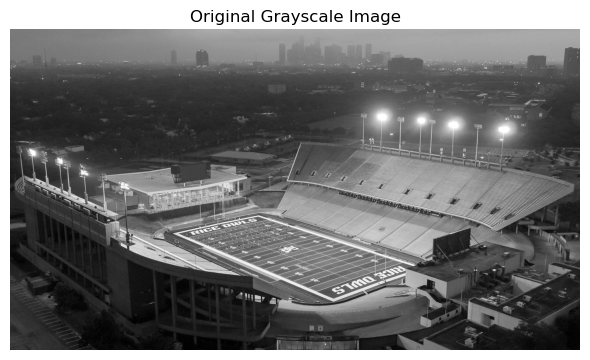

In [13]:
img = imread("ricestadium.jpeg")        
if img.ndim == 3:
    img_gray = img.mean(axis=2)       
else:
    img_gray = img.copy()

plt.figure(figsize=(6, 6))
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.tight_layout()
plt.show()



## 3. Function to Reconstruct Image

This algorithm decomposes the intensity matrix into three matrices called U, S, and VT. This process is done using Singular Value Decomposition. Each singular value within these matrices measures how much of the image’s overall variance is captured. Larger values indicate the most visually important structures and smaller values capture more fine details and noise.

The reconstruct_image() function takes an integer k and rebuilds an approximation of the original matrix using only the first k values. So if k gets set to 50, the function uses the first 50 columns of U, the first 50 rows of VT, and forms a 50 x 50 diagonal matrix from the first 50 values. A smaller k results in greater compression but more loss of fine detail. A larger k results in reduced compress but retains more fine details.

In [14]:
U, S, VT = np.linalg.svd(img_gray, full_matrices=False)
def reconstruct_image(k):
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    VT_k = VT[:k, :]
    return U_k @ S_k @ VT_k

## 4. Display Compressed Images by Rank-# Approximation

This code block loops over the k values that I chose to select: 5, 20, 50, 100, 200. It reconstructs and displays each approximation alongside the original photo. The visualization shows that as k increases, the approximation shows more fine details (to the naked eye, it becomes more clear), but the compression ratio declines because more individual components of the photo must be stored.

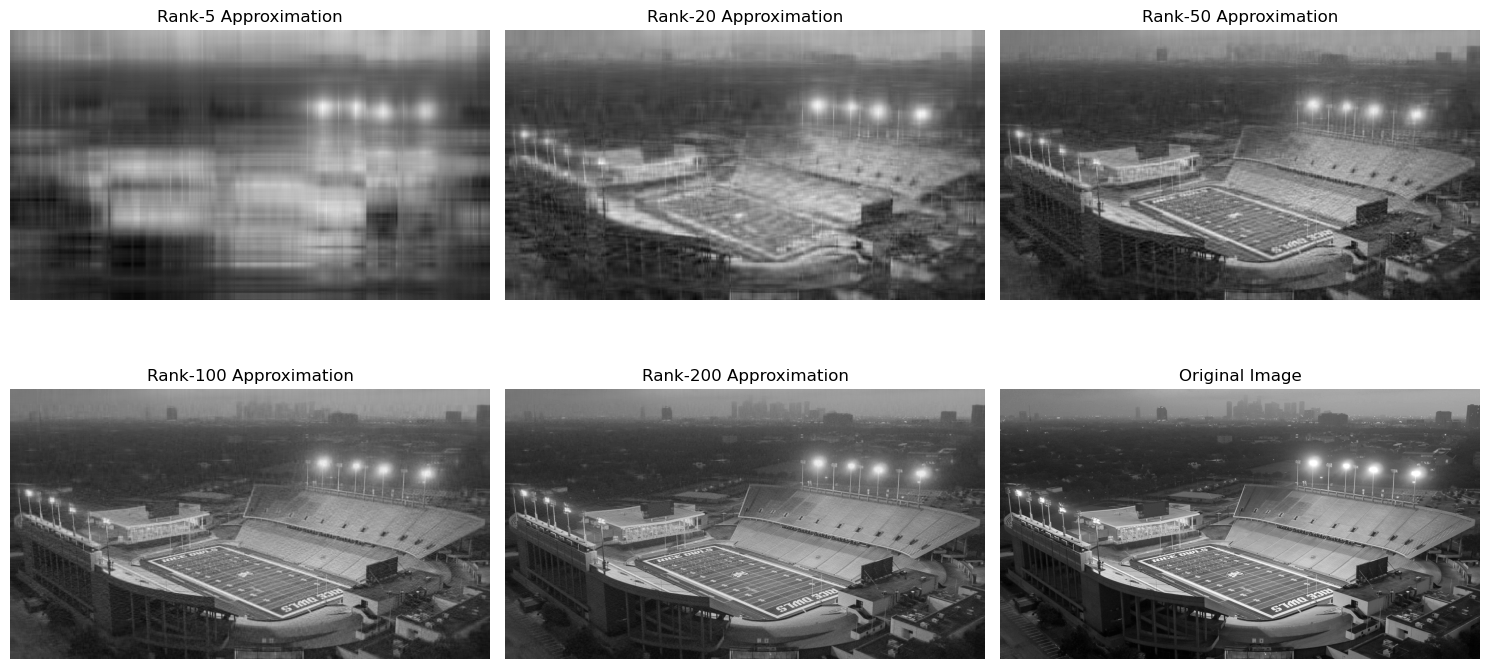

In [19]:
k_values = [5, 20, 50, 100, 200]

plt.figure(figsize=(15, 8))
for i, k in enumerate(k_values):
    compressed = reconstruct_image(k)
    plt.subplot(2, 3, i + 1)
    plt.imshow(compressed, cmap='gray')
    plt.title(f"Rank-{k} Approximation")
    plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.tight_layout()
plt.show()

## 5. Load and Preview Color Image

Next, I wanted to do an implementation with a full-color image -- instead of converting an image to grayscale, I am leaving it in 3-D intensity.

In [16]:
img_color = imread("reckling.jpg")   
if img_color.max() > 1.0:
    img_color = img_color / 255.0           

## 6. Compress RGB (Color) Channels

This function loops over three slices of the image, and on each slice it performs an SVD. This process keeps only the top k number of values and reconstructs a rank-k approximation, similar to what it performed on the grayscale example. At the end, the three compressed channels are stacked together, producing a color (RGB) image. A larger k will once again create a more clear image with more fine details. 

In [17]:
def compress_color_image(img, k):
    compressed_channels = []
    for i in range(3):  
        channel = img[:, :, i]
        U, S, VT = np.linalg.svd(channel, full_matrices=False)
        S_k = np.diag(S[:k])
        U_k = U[:, :k]
        VT_k = VT[:k, :]
        compressed_channel = np.clip(U_k @ S_k @ VT_k, 0, 1)
        compressed_channels.append(compressed_channel)
    return np.stack(compressed_channels, axis=2)

## 7. Show Original and Reconstructed Color Images

This code block loops over the k values that I chose to select: 5, 20, 50, 100, 200. It reconstructs and displays each approximation alongside the original photo. The visualization shows that as k increases, the approximation shows more fine details (to the naked eye, it becomes more clear), but the compression ratio declines because more individual components of the photo must be stored. In addition, since this is an RBG image, a larger k will produce more fine color gradients.

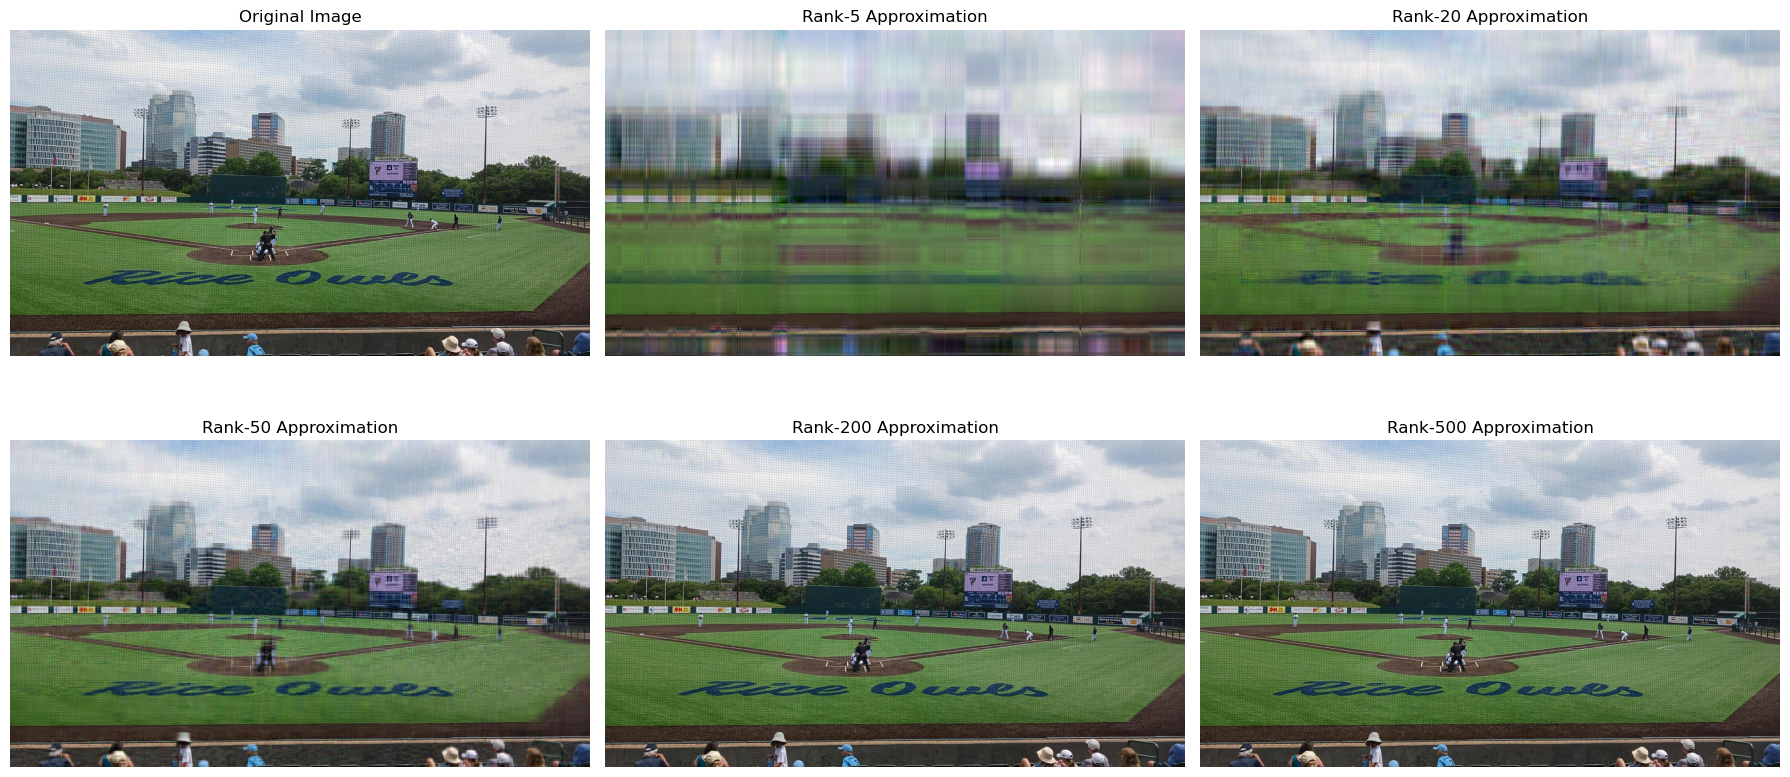

In [18]:
k_values = [5, 20, 50, 200, 500]
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(img_color)
plt.title("Original Image")
plt.axis('off')

for i, k in enumerate(k_values):
    compressed_img = compress_color_image(img_color, k)
    plt.subplot(2, 3, i + 2)
    plt.imshow(compressed_img)
    plt.title(f"Rank-{k} Approximation")
    plt.axis('off')

plt.tight_layout()
plt.show()
